In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
## class for linear regression same for simple and multiple

class LinearRegression:
    def __init__(self,learning_rate, n_iterations):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations 
    
    def fit(self,X,y):
        self.X = X
        self.y = y
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]

        # add one to each feature set to represent bias
        self.feature_matrix = np.hstack((np.ones((self.n_samples,1)), X))

        # intlize parameters
        self.parameters = np.zeros((self.n_features + 1,1))

        # for plotting gradient descent
        self.plot_grads = []

        for i in range(self.n_iterations):
            y_pred = self.predict(X)

            # calculate gradients wrt all parameters
            gradients = (1/self.n_features) * self.feature_matrix.T.dot(y_pred-y)
            self.parameters = self.parameters - self.learning_rate * gradients

            # gradient for first parameter
            self.plot_grads.append(gradients[1])
        return self.parameters

    def predict(self, X):
        feature_vector = np.hstack((np.ones((X.shape[0],1)),X))
        return feature_vector.dot(self.parameters)

    def print_grad_plot(self):
        plt.scatter(np.arange(self.n_iterations), np.array(self.plot_grads))
        plt.xlabel('iterations')
        plt.ylabel('gradient for x1')
        plt.show()

In [92]:
# creating data frame from sklearn dataset
from sklearn import datasets

dataset = datasets.load_diabetes()

df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)

m = len(df.index)
print(m)

df.head()

442


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


plot of x1 and y


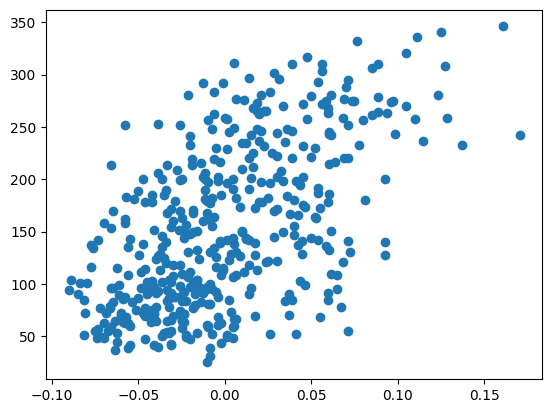

plot of x2 and y


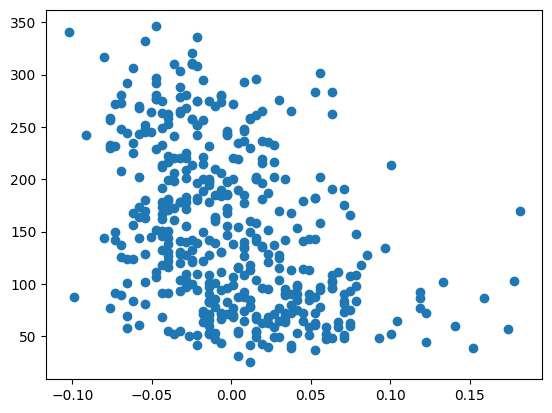

In [93]:
# plotting graph of x and y
x1_label = 'bmi'
x2_label = 's3'
y_label = 'target'

print('plot of x1 and y')
plt.scatter(df[x1_label],df[y_label])
plt.show()

print('plot of x2 and y')
plt.scatter(df[x2_label],df[y_label])
plt.show()

In [94]:
# extracting X and y
# converting y into column matrix

y = df[y_label].to_numpy().reshape(m,1)

print("y as 2d column matrix")
print(y[:5,:])

# creating x1, x2 and x
x1 = df[x1_label].to_numpy().reshape(m,1)
x2 = df[x2_label].to_numpy().reshape(m,1)
X = np.hstack((x1,x2)) 
print("x as 2d column matrix")
print(X[:5,:])

y as 2d column matrix
[[151.]
 [ 75.]
 [141.]
 [206.]
 [135.]]
x as 2d column matrix
[[ 0.06169621 -0.04340085]
 [-0.05147406  0.07441156]
 [ 0.04445121 -0.03235593]
 [-0.01159501 -0.03603757]
 [-0.03638469  0.00814208]]


[[ 152.13348416]
 [ 791.55287071]
 [-359.25004857]]


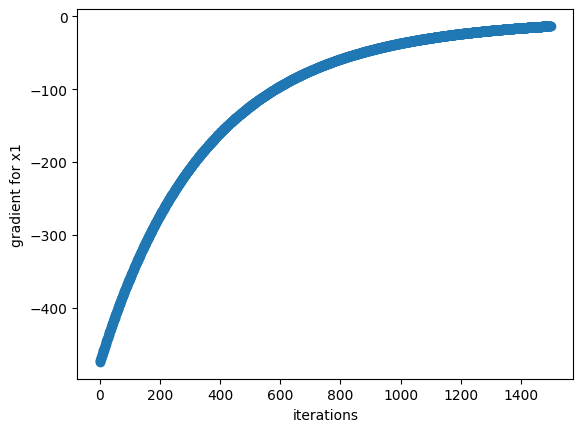

In [95]:
linear_reg = LinearRegression(0.0045, 1500)
params = linear_reg.fit(X,y)
print(params)
linear_reg.print_grad_plot()

y_pred = linear_reg.predict(X)

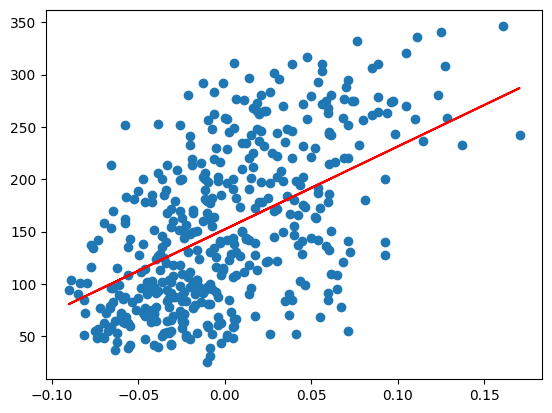

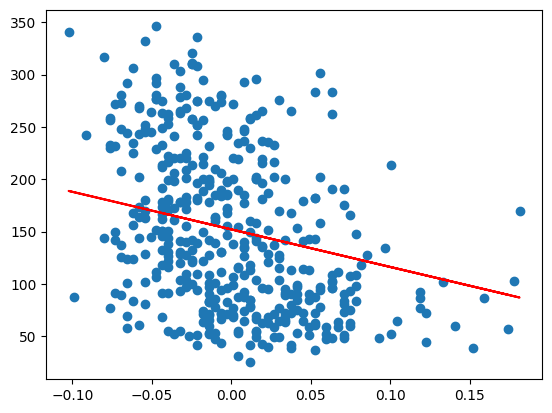

In [96]:
# plotting wrt x1
y_pred_x1 = np.hstack((np.ones((m,1)),x1)).dot(params[[0,1],:])
plt.scatter(x1,y)
plt.plot(x1,y_pred_x1, color="r")
plt.show()

# plotting wrt x2
y_pred_x2 = np.hstack((np.ones((m,1)),x2)).dot(params[[0,2],:])
plt.scatter(x2,y)
plt.plot(x2,y_pred_x2, color="r")
plt.show()

In [97]:
# analytical method
feature_vector = np.hstack((np.ones((m,1)),X))
print("feature vector head")
print(feature_vector[:5,:])

print("parameters")
theta_best = np.linalg.inv(feature_vector.T.dot(feature_vector)).dot(feature_vector.T).dot(y)
print(theta_best)

y_pred = feature_vector.dot(theta_best)
print("y_pred head")
print(y_pred[:5,:])

feature vector head
[[ 1.          0.06169621 -0.04340085]
 [ 1.         -0.05147406  0.07441156]
 [ 1.          0.04445121 -0.03235593]
 [ 1.         -0.01159501 -0.03603757]
 [ 1.         -0.03638469  0.00814208]]
parameters
[[ 152.13348416]
 [ 826.14824417]
 [-336.10503357]]
y_pred head
[[217.69093954]
 [ 84.59817761]
 [199.7317677 ]
 [154.66669198]
 [119.3377393 ]]


In [98]:
# using skitlearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

[152.13348416] [[ 826.14824417 -336.10503357]]
